### Task A

### Regression

import library

In [1]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt

Creating your own dataset and label

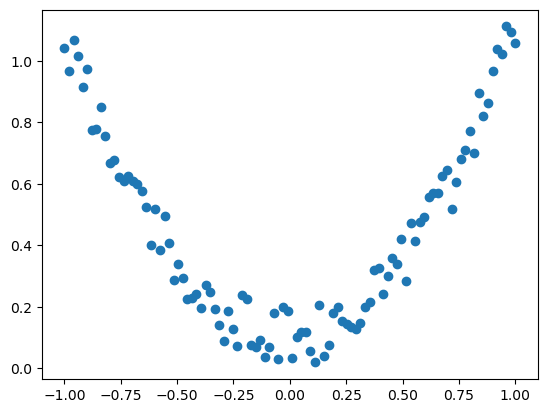

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
# x = torch.unsqueeze(torch.linspace(0, 22/7, 200), dim=1)
# y = torch.sin(2*x) + 0.2*torch.rand(x.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

Defining your simple model

In [4]:
from torch import nn
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # 1- hidden  linear layer
        # 2- output linear layer
        self.linear1 = nn.Linear(n_feature, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # 1- ReLu activation function for hidden layer
        # 2- linear output
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

Define Hyper Parameters

In [6]:
# Hyperparameter
n_feature= 1
n_hidden = 10
n_output = 1
lr       = 0.2
epochs   = 200

Create instance of model, define loss function and optimizer

In [7]:
net = Net(n_feature, n_hidden, n_output)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

Net(
  (linear1): Linear(in_features=1, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


Start training the model

You have to do 5 steps in this part

    1- predict based on x
    2- compute loss
    3- clear gradients for next train
    4- backpropagation
    5- apply gradients

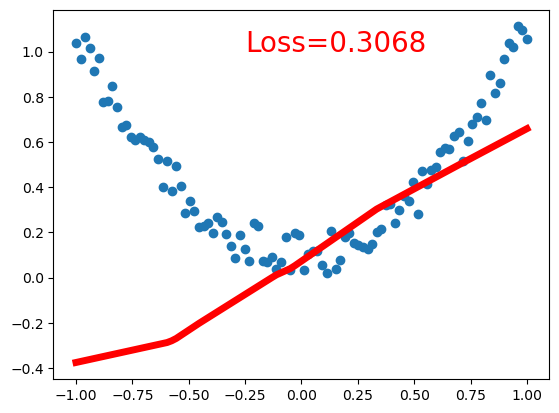

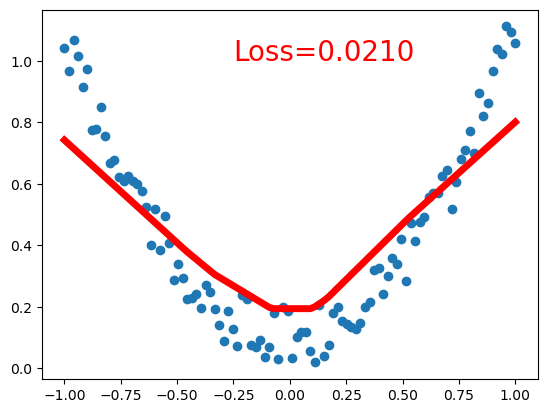

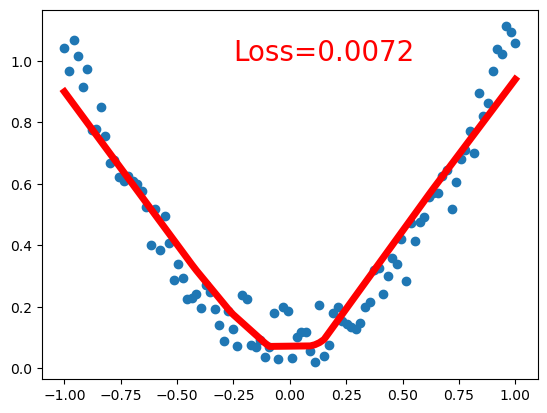

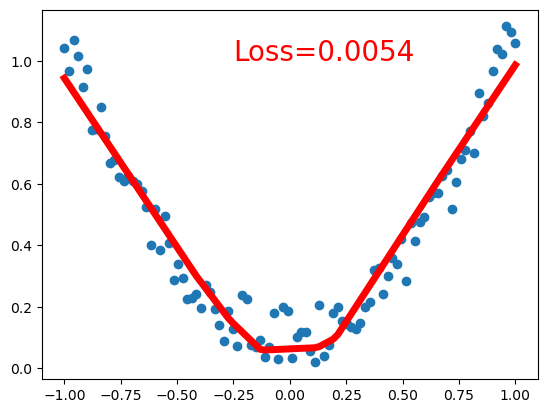

In [8]:
# Training
for t in range(epochs):
    # 1- input x and predict based on x
    # 2- compute loss
    # 3- clear gradients for next train
    # 4- backpropagation, compute gradients
    # 5- apply gradients
    prediction = net(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()  
    optimizer.step() 

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(-0.25,1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)